# Loan Status Prediction

### Importing all dependencies

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data Collection and Processing

In [87]:
loan_dataset = pd.read_csv("loan.csv")

In [88]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [90]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [91]:
# missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [93]:
# check again
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [94]:
# label encoding
loan_dataset.replace({"Loan_Status": {"N":0, "Y":1}}, inplace = True)

In [95]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [96]:
# dependent columns values
loan_dataset["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [97]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [98]:
loan_dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data Visualization

In [99]:
import matplotlib.pyplot as plt

In [16]:
sns.set_palette("tab10")

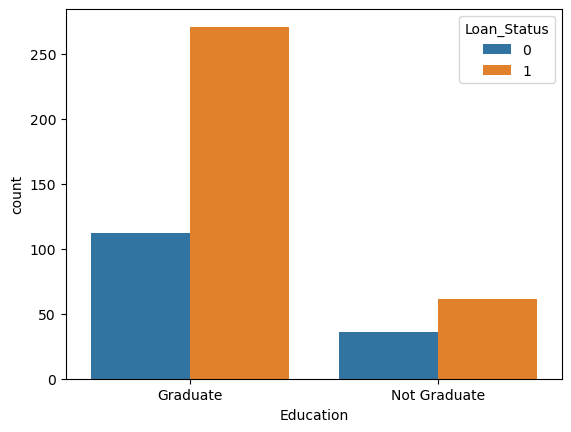

In [17]:
# education and load status
sns.countplot(x = 'Education', hue = "Loan_Status", data = loan_dataset)
plt.show()

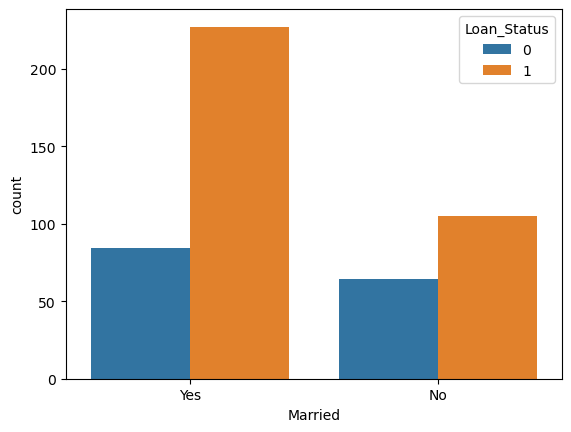

In [18]:
# Marital status and loan status
sns.countplot(x = 'Married', hue = "Loan_Status", data = loan_dataset)
plt.show()

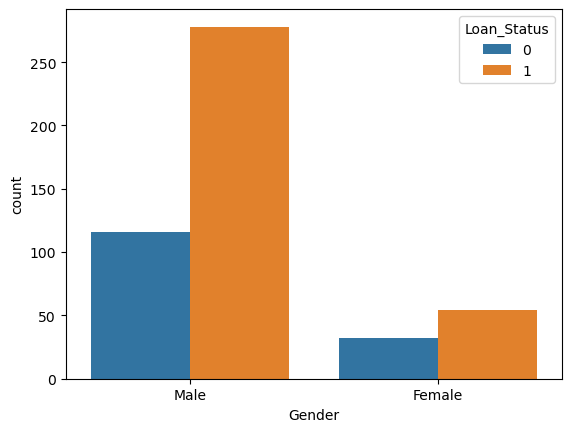

In [19]:
# marital Gender and loan status
sns.countplot(x = 'Gender', hue = "Loan_Status", data = loan_dataset)
plt.show()

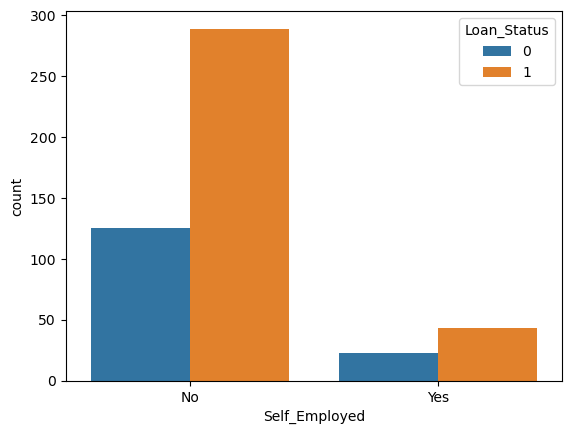

In [20]:
# marital Self_Employed and loan status
sns.countplot(x = 'Self_Employed', hue = "Loan_Status", data = loan_dataset)
plt.show()

### Feature Engineering

In [105]:
# convert categorical columns to numerical values
loan_dataset.replace({"Married":{"No":0, "Yes":1}, 
                      "Gender":{"Male":1, "Female": 0},
                      "Self_Employed": {"No": 0, "Yes": 1},
                      "Property_Area": {"Rural": 0, "Semiurban": 1, "Urban": 2},
                      "Education": {"Graduate": 1, "Not Graduate": 0},
                      "Dependents": {"0": 0, "1": 1}
                     }, inplace = True)

In [106]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [107]:
# data and label separation
X = loan_dataset.drop(columns = ["Loan_ID", "Loan_Status"], axis = 1).values
Y = loan_dataset["Loan_Status"].values

In [108]:
print(X)
print(Y)

[[1 1 1 ... 360.0 1.0 0]
 [1 1 0 ... 360.0 1.0 2]
 [1 1 0 ... 360.0 1.0 2]
 ...
 [1 1 1 ... 360.0 1.0 2]
 [1 1 '2' ... 360.0 1.0 2]
 [0 0 0 ... 360.0 0.0 1]]
[0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1
 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 1 1 

### Split Training and Test data

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [110]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (480, 11)
Train data:  (432, 11)
Test data:  (48, 11)


In [111]:
print(X_train)
print(Y_train)

[[0 0 0 ... 360.0 0.0 1]
 [1 1 1 ... 360.0 1.0 1]
 [1 1 '2' ... 180.0 1.0 2]
 ...
 [1 0 0 ... 360.0 1.0 2]
 [0 0 0 ... 300.0 1.0 1]
 [1 1 4 ... 360.0 1.0 0]]
[1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 

### Model Training

In [112]:
classifier = svm.SVC(kernel = "linear")

In [113]:
# training svc
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation

In [145]:
# accuracy score on the training data
X_train_prediciton = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.7986111111111112


In [84]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.8333333333333334


# Predictive System

In [187]:
Y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

In [202]:
Y_test[19]

0

In [195]:
#Y[6]

In [203]:
X_new = X_test[19]
#X_new = X[6]
X_new

array([1, 0, 0, 0, 0, 2333, 1451.0, 102.0, 480.0, 0.0, 2], dtype=object)

In [204]:
X_new = X_new.reshape(1, -1)
X_new

array([[1, 0, 0, 0, 0, 2333, 1451.0, 102.0, 480.0, 0.0, 2]], dtype=object)

In [205]:
prediction = classifier.predict(X_new)
print(prediction)

[0]


In [206]:
if(prediction[0] == 0):
    print("Loan not approved.")
else:
    print("Loan approved")

Loan not approved.
